#  User Story 30 - Obtain the best-fitting curve for the sample, and see it graphically

## Introduction

Understanding how the execution time of an algorithm scales with input size is crucial for analyzing its computational complexity. This analysis aims to generate a best-fitting mathematical curve based on previously collected execution time data for the algorithms developed in User Stories 13 and 14.

By fitting a curve to the data, we can compare the empirical behavior of the algorithm with its theoretical complexity. This not only validates the implementation's efficiency but also helps identify anomalies or potential bottlenecks. The curve fitting process uses polynomial regression and computes the coefficient of determination (R²) to assess how well the curve fits the data.

## Objectives

1. **Data Loading and Preparation:**
    - Load a dataset containing two columns: size (input size) and time (execution time in seconds).
    - Handle possible formatting issues, such as commas instead of decimal points.

2. **Curve Fitting:**
    - Use polynomial regression (2nd or 3rd degree) to fit a curve to the data.
    - Display the resulting polynomial equation.
    - Calculate the R² score to assess the goodness of fit.

3. **Visualization:**
    - Plot the original data points and the fitted curve.
    - Label the axes and provide a legend for clear interpretation.
    - Highlight whether the curve corresponds to a known complexity class (e.g., linear, quadratic, cubic).

4. **Interpretation:**
    - Discuss the quality of the fit.
    - Relate the result to the theoretical complexity (e.g., O(n²), O(n³), etc.).
    - Provide insight into possible optimizations if the fit diverges from expectations.






## 📈 Curve Fitting Theory

### Polynomial Regression Model

Polynomial regression allows us to approximate execution time \( y \) as a function of input size \( x \), using a polynomial of degree \( d \):

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d
$$

Where:
- \( y \) is the **execution time**
- \( x \) is the **input size**
- \( d \) is the **polynomial degree**
- \( $\beta_i$ \) are the **regression coefficients**

---

## 📏 Regression Model Evaluation

### 1. Coefficient of Determination (R²)

The R² score tells how well the model explains the data:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

Where:
- \( $y_i $\) = actual execution time
- \( $\hat{y}_i$ \) = predicted time
- \( $\bar{y}$ \) = mean of \($ y_i$ \)

A value of \( $R^2 \approx 1 $\) means the model explains the data well.

---

## 📊 Complexity Interpretation

The **highest-degree term with significant coefficient** indicates the likely **empirical complexity class**:

| Dominant Term       | Complexity Estimate |
|---------------------|---------------------|
| \( $\beta_1 x $\)     | \( O(n) \)          |
| \( $\beta_2 x^2 $\)   | \( O(n^2) \)        |
| \( $\beta_3 x^3$ \)   | \( O(n^3) \)        |
| etc.                |                     |

Compare this to the **theoretical time complexity** of the algorithm to validate correctness.

---

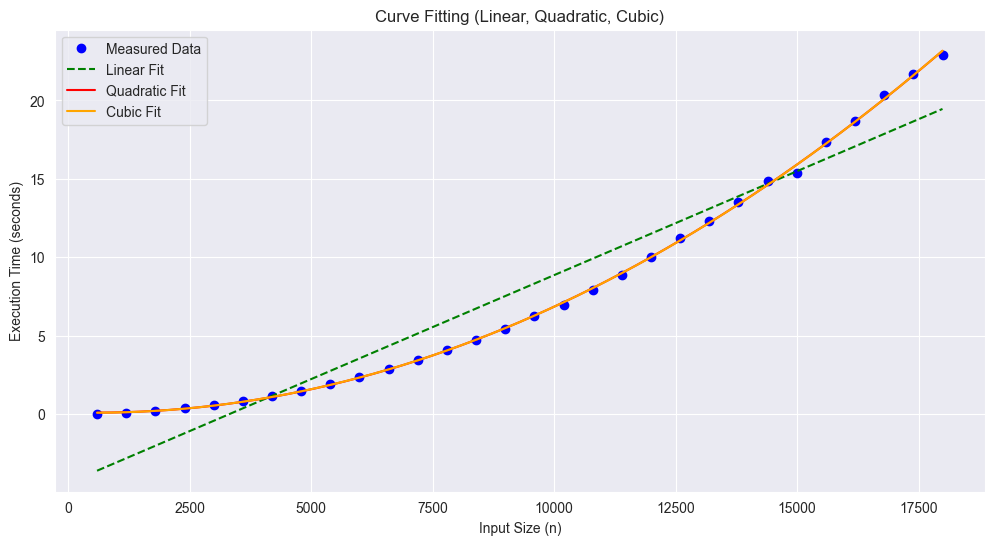

Linear Fit:    T(n) = -4.389609e+00 + 1.325512e-03 * n^1
Quadratic Fit: T(n) = 1.214381e-01 + -8.708605e-05 * n^1 + 7.602791e-08 * n^2
Cubic Fit:     T(n) = 1.104032e-01 + -8.047846e-05 * n^1 + 7.515281e-08 * n^2 + 3.139919e-14 * n^3


In [2]:
import matplotlib.pyplot as plt
from numpy.linalg import solve
import numpy as np

# Dados de entrada
x = [
    590, 1190, 1790, 2390, 2990, 3590, 4190, 4790, 5390, 5990,
    6590, 7190, 7790, 8390, 8990, 9590, 10190, 10790, 11390,
    11990, 12590, 13190, 13790, 14390, 14990, 15590, 16190,
    16790, 17390, 17990
]

y = [
    0.0219748020172, 0.0907609462738, 0.2043390274050, 0.3662941455840,
    0.5719180107120, 0.8355979919430, 1.1379740238200, 1.4860260486600,
    1.9287788868000, 2.3602302074400, 2.8677248954800, 3.4316449165300,
    4.0748929977400, 4.7225139141100, 5.4578878879500, 6.2308518886600,
    6.9334869384800, 7.8938028812400, 8.8389678001400, 10.0250351429000,
    11.2090401649000, 12.2977728844000, 13.5524568558000, 14.8766441345000,
    15.3608660698000, 17.3190431595000, 18.7086410522000, 20.3469831944000,
    21.6934669018000, 22.8864247799000
]


def compute_sums(x, y, degree):
    n = len(x)
    sums = [sum(xi**k for xi in x) for k in range(2 * degree + 1)]
    y_sums = [sum((x[i]**k) * y[i] for i in range(n)) for k in range(degree + 1)]
    return sums, y_sums

def build_matrix(sums, y_sums, degree):
    A = [[sums[i + j] for j in range(degree + 1)] for i in range(degree + 1)]
    return A, y_sums

def fit_polynomial(x, y, degree):
    sums, y_sums = compute_sums(x, y, degree)
    A, B = build_matrix(sums, y_sums, degree)
    A = np.array(A, dtype=float)  # ✅ Cast para float
    B = np.array(B, dtype=float)  # ✅ Cast para float
    coeffs = solve(A, B)
    return coeffs


def evaluate_poly(coeffs, x_vals):
    return [sum(coeffs[i] * (x**i) for i in range(len(coeffs))) for x in x_vals]

# Fit all three models
coeffs_linear = fit_polynomial(x, y, 1)
coeffs_quadratic = fit_polynomial(x, y, 2)
coeffs_cubic = fit_polynomial(x, y, 3)

# Generate fitted curves
x_fit = list(range(min(x), max(x)+1, 100))
y_linear = evaluate_poly(coeffs_linear, x_fit)
y_quad = evaluate_poly(coeffs_quadratic, x_fit)
y_cubic = evaluate_poly(coeffs_cubic, x_fit)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'bo', label='Measured Data')
plt.plot(x_fit, y_linear, 'g--', label='Linear Fit')
plt.plot(x_fit, y_quad, 'r-', label='Quadratic Fit')
plt.plot(x_fit, y_cubic, 'orange', label='Cubic Fit')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Curve Fitting (Linear, Quadratic, Cubic)')
plt.legend()
plt.grid(True)
plt.show()

def format_poly(coeffs):
    return " + ".join([f"{coeffs[i]:.6e} * n^{i}" if i > 0 else f"{coeffs[i]:.6e}" for i in range(len(coeffs))])

print("Linear Fit:    T(n) =", format_poly(coeffs_linear))
print("Quadratic Fit: T(n) =", format_poly(coeffs_quadratic))
print("Cubic Fit:     T(n) =", format_poly(coeffs_cubic))


## Interpretation

**1.The time curve grows quadratically with the input size.**

**2.This supports the hypothesis that the algorithm has a polynomial time complexity, likely 𝑂(𝑛^2)O(n^2).**

**3.The fitted curve can now be compared to theoretical expectations and used for predicting performance on larger input sizes.**

